In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('2.01. Admittance.csv')

In [6]:
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})

In [9]:
x1=data['SAT']
y=data['Admitted']

In [12]:
x=sm.add_constant(x1)

C:\Users\sindhu\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [21]:
reg=sm.OLS(y,x)
reg_fit=reg.fit()
y_hat=reg_fit.params[0]+x1*reg_fit.params[1]

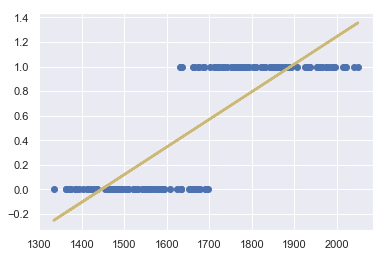

In [22]:
plt.scatter(x1,y)
plt.plot(x1,y_hat,lw=2.5,color='C8')

In [44]:
reg=sm.Logit(y,x)
reg_fit=reg.fit()
reg_fit.summary()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 11 Jun 2020   Pseudo R-squ.:                  0.7992
Time:                        16:32:32   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
                                        LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [37]:
def f(x,b0,b1):
    return np.array(np.exp(b0+b1*x)/(1+np.exp(b0+b1*x)))
f_sorted=np.sort(f(x1,reg_fit.params[0],reg_fit.params[1]))
x_sorted=np.sort(np.array(x1))
reg_fit.params

const   -69.912802
SAT       0.042005
dtype: float64

Text(0, 0.5, 'Admitted')

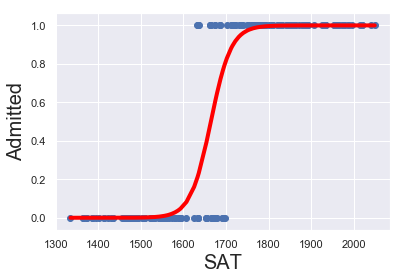

In [36]:
plt.scatter(x1,y)
plt.plot(x_sorted,f_sorted,lw=4,color='red')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admitted',fontsize=20)

In [38]:
const=np.ones(168)

In [39]:
const

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [40]:
reg=sm.Logit(y,const)

In [42]:
reg_fit=reg.fit()

Optimization terminated successfully.
         Current function value: 0.686044
         Iterations 4


In [43]:
reg_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            0
Date:                Thu, 11 Jun 2020   Pseudo R-squ.:               7.410e-11
Time:                        16:29:46   Log-Likelihood:                -115.26
converged:                       True   LL-Null:                       -115.26
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2392      0.155      1.539      0.124      -0.065       0.544
==============================================================================
"""

In [47]:
#10 unit difference
np.exp(0.042*10)

1.5219615556186339

In [48]:
#1Unit difference
np.exp(0.042)

1.0428944787507632